### Notebook computing the relic neutrino density using KFT for a range of neutrino masses

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import copy

font = {'size'   : 22}
matplotlib.rc("font", **font)
matplotlib.rc(["text.usetex", True])

sys.path.insert(0,'../source/')
import model 
import pert_first
import perturbation_old
import utils
from kftneutrinos import py_first_order

In [11]:
x_here = np.array([8.0, 0.0, 0.0])
Tnu = model.Tnu

masses = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]


z_ini = 3.0
z_span = [0, z_ini]

Gauss_Laguerre = 40
rtols = [1e-6, 1e-0, 1e-4, 1e-5]
atols = [1e-35, 1e-35, 1e-35, 1e-35] # fixed

In [12]:
int_free_analytical = 4*np.pi*1.803*model.Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

The analytical free integral is 1.06738178968e-10.


In [13]:
ints_first = []
for mass in masses:
    begin = time()
    new_int = pert_first.integral(z_span, rtols, atols, x_here, mass, Tnu, Gauss_Laguerre=Gauss_Laguerre)
    print(f"Found {new_int[0]:.12} at {mass=} eV in {time() - begin:.5} seconds.")
    ints_first.append(new_int[0]/int_free_analytical)

Found 2.04350001577e-13 at mass=0.01 eV in 8.4772 seconds.
Found 1.30818809443e-12 at mass=0.025 eV in 7.3177 seconds.
Found 5.34903367309e-12 at mass=0.05 eV in 9.4243 seconds.
Found 1.23842392076e-11 at mass=0.075 eV in 9.6327 seconds.
Found 2.25615619691e-11 at mass=0.1 eV in 9.6635 seconds.
Found 5.27694858154e-11 at mass=0.15 eV in 8.4474 seconds.
Found 9.69025911688e-11 at mass=0.2 eV in 8.4503 seconds.
Found 1.55469962467e-10 at mass=0.25 eV in 8.4439 seconds.
Found 2.29153784518e-10 at mass=0.3 eV in 8.6882 seconds.
Found 3.18247415977e-10 at mass=0.35 eV in 7.397 seconds.


### Figure

In [14]:
# Mertsch NFW only data 
mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

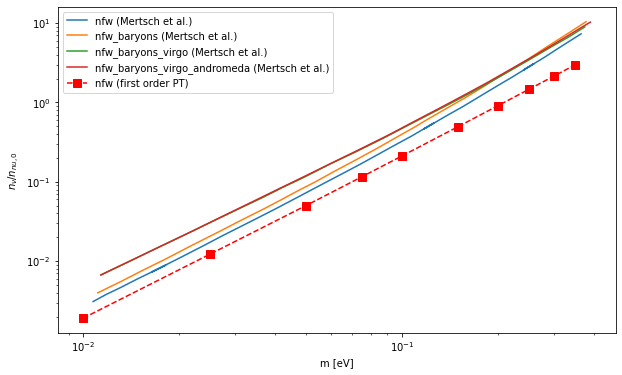

In [15]:
masses = np.array(masses)

fig, ax = plt.subplots(1, 1, figsize=[10, 6])
for label, data in mertsch.items():
    ax.plot(data[:, 0]*1e-3, data[:, 1], '-', label=f"{label} (Mertsch et al.)")
ax.plot(masses, ints_first, 'rs--', markersize=8, label='nfw (first order PT)')

ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{nu,0}$', xscale='log', yscale='log')
#ax.axvline(x=0.06, label='minimum mass')
ax.legend(frameon=True)
fig.savefig('mass.pdf')

### Plotting difference between Mertsch result and first order

In [22]:
import numba

ModuleNotFoundError: No module named 'numba'

In [16]:
from scipy.interpolate import interp1d
def interp_onto(xdata, ydata, new_xdata):
    return interp1d(xdata, ydata, fill_value="extrapolate")(new_xdata)

In [17]:
mlist = np.logspace(-2, 0, 1000)
mertsch_interp = interp_onto(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], mlist)
first_interp = interp_onto(masses, ints_first, mlist)

[Text(0.5, 0, 'm [eV]'),
 Text(0, 0.5, '$|n_{nu}^{1st\\ order} - n_{nu,Mertsch}|$'),
 None,
 None]

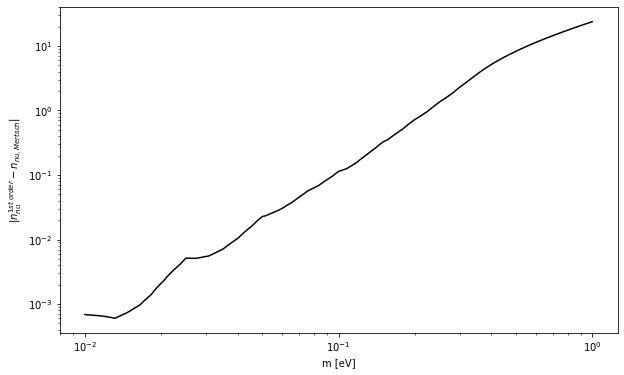

In [18]:
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
ax.plot(mlist, np.abs(first_interp - mertsch_interp), 'k-', markersize=8)
ax.set(xlabel='m [eV]', ylabel=r'$|n_{nu}^{1st\ order} - n_{nu,Mertsch}|$', xscale='log', yscale='log')

[Text(0.5, 0, 'm [eV]'),
 Text(0, 0.5, '$|n_{nu}^{1st\\ order} - n_{nu,Mertsch}|/n_{nu,Mertsch}$'),
 None,
 None]

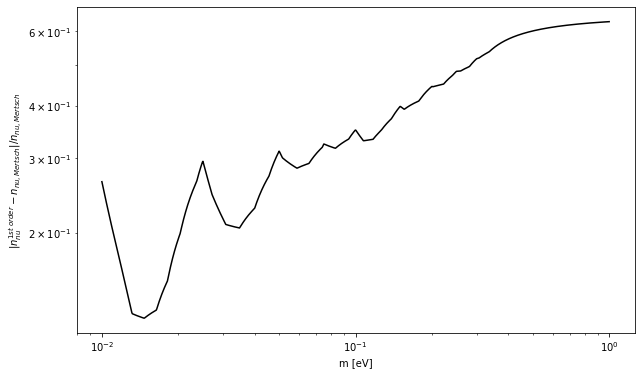

In [21]:
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
ax.plot(mlist, np.abs(first_interp - mertsch_interp)/mertsch_interp, 'k-', markersize=8)
ax.set(xlabel='m [eV]', ylabel=r'$|n_{nu}^{1st\ order} - n_{nu,Mertsch}|/n_{nu,Mertsch}$', xscale='log', yscale='log')

**Conclusion**: Relative error is basically the same across all masses. Our computation isn't converging at small masses!